In [1]:
import matplotlib.pyplot as plt
import polars as pl
import numpy as np
from uatk_spc import Reader

#### Compare `Reader` with Protobuffer and Parquet

Compare the ability to read into dataframes and dict directly from protobuf or from parquet.


In [2]:
%%time
path = "../../data/output/England/2020/"
region = "rutland"

# Read from protobuf
spc = Reader(path, region, input_type="protobuf")

CPU times: user 4.88 s, sys: 188 ms, total: 5.06 s
Wall time: 5.08 s


In [3]:
# Show people after read from protobuf
spc.people

id,household,workplace,identifiers,demographics,employment,health,events,weekday_diaries,weekend_diaries
str,str,str,struct[4],struct[4],struct[6],struct[7],struct[7],list[i64],list[i64]
"""0""","""0""","""1168""","{""E02002863_0001_001"",""17310308"",""2"",""2908614""}","{""MALE"",44,""WHITE"",""SEMIROUTINE""}","{""F"",""43"",""5241"",""EMPLOYEE_FT"",18137.6,8.72}","{39.47709,false,false,false,""GOOD"",""HIGH"",""0""}","{0.255,0.16065,0.002589,0.001109,2.7350748,1.1721749,0.15741}","[1796, 2877, … 15973]","[1795, 2876, … 15974]"
"""1""","""0""","""155""","{""E02002863_0001_002"",""12050117"",""1"",""2904675""}","{""FEMALE"",41,""WHITE"",""LOWER""}","{""G"",""47"",""2421"",""EMPLOYEE_FT"",49649.953,27.280193}","{22.909258,false,false,false,""GOOD"",""VERY_HIGH"",""1""}","{0.255,0.1887,0.008982,0.020958,1.0750833,2.5085278,0.15741}","[289, 2183, … 15161]","[288, 2184, … 15162]"
"""2""","""1""","""0""","{""E02002863_0002_001"",""11280408"",""2"",""2906341""}","{""MALE"",68,""WHITE"",""SUPER""}","{""S"",""96"",""5119"",""SELF_EMPLOYED"",0.0,0.0}","{25.25762,false,false,false,""GOOD"",""LOW"",""0""}","{0.239,0.15057,8.4672e-16,3.6288e-16,0.228979,0.098134,0.15741}","[89, 677, … 16391]","[88, 678, … 16390]"
"""3""","""1""","""0""","{""E02002863_0002_002"",""16110805"",""1"",""2904451""}","{""FEMALE"",62,""WHITE"",""NEVER""}","{""P"",""85"",""9244"",""EMPLOYEE_PT"",1921.6006,9.238464}","{31.486355,false,true,true,""VERY_BAD"",""MEDIUM"",""0""}","{0.268,0.09916,3.5557e-12,8.2967e-12,0.309534,0.7222454,0.131175}","[2844, 5035, … 15284]","[2845, 5034, … 15283]"
"""4""","""1""","""0""","{""E02002863_0002_003"",""16241112"",""6"",""2900274""}","{""MALE"",10,""WHITE"",""HIGHER""}","{"""",""0"",""0"",""NA"",0.0,0.0}","{0.0,false,false,false,""GOOD"",""LOW"",""0""}","{0.257,0.16191,0.165205,0.070802,0.005898,0.002528,0.107325}","[33, 74, … 16378]","[32, 75, … 16379]"
"""5""","""2""","""0""","{""E02002863_0003_001"",""15131020"",""2"",""2911137""}","{""MALE"",59,""WHITE"",""LOWER""}","{""Q"",""86"",""2215"",""SELF_EMPLOYED"",0.0,0.0}","{36.944996,false,false,false,""GOOD"",""HIGH"",""0""}","{0.268,0.33768,4.9777e-10,2.1333e-10,1.1239074,0.481675,0.160325}","[473, 494, … 16164]","[474, 493, … 16163]"
"""6""","""2""","""1869""","{""E02002863_0003_002"",""17050101"",""2"",""2902963""}","{""FEMALE"",58,""WHITE"",""INTERMEDIATE""}","{""M"",""72"",""3539"",""EMPLOYEE_PT"",9068.8,8.72}","{28.937033,true,true,true,""FAIR"",""LOW"",""4""}","{0.268,0.19832,7.7543e-10,1.8093e-9,0.54735,1.277151,0.160325}","[2385, 4529, … 14047]","[2384, 4528, … 14046]"
"""7""","""3""","""0""","{""E02002863_0004_001"",""16230616"",""2"",""2902653""}","{""MALE"",48,""WHITE"",""HIGHER""}","{""Q"",""88"",""1115"",""EMPLOYEE_FT"",80020.63,38.47146}","{30.083155,false,false,false,""GOOD"",""HIGH"",""0""}","{0.279,0.35154,0.000095,0.000041,2.6761558,1.1469239,0.160325}","[1008, 1042, … 13283]","[1009, 1043, … 13282]"
"""8""","""3""","""376""","{""E02002863_0004_002"",""11280707"",""1"",""2911380""}","{""FEMALE"",48,""WHITE"",""ROUTINE""}","{""G"",""47"",""7111"",""EMPLOYEE_PT"",7501.991,9.016816}","{38.12921,false,false,false,""GOOD"",""LOW"",""0""}","{0.279,0.10323,0.000041,0.000095,1.1469239,2.6761558,0.160325}","[148, 385, … 15497]","[149, 386, … 15498]"


In [4]:
%%time
# Read from parquet and JSON
spc = Reader(path, region, input_type="parquet")

CPU times: user 97.2 ms, sys: 24.4 ms, total: 122 ms
Wall time: 78.9 ms


In [5]:
# Show households after read from parquet and JSON
spc.households.head()

id,msoa11cd,oa11cd,members,details
u64,str,str,list[u64],struct[8]
0,"""E02002863""","""E00069595""","[0, 1]","{""E02002863_0001"",6,1,null,6,true,1,1}"
1,"""E02002863""","""E00069551""","[2, 3, 4]","{""E02002863_0002"",5,3,null,5,true,5,2}"
2,"""E02002863""","""E00069564""","[5, 6]","{""E02002863_0003"",2,2,null,6,true,1,1}"
3,"""E02002863""","""E00069558""","[7, 8]","{""E02002863_0004"",1,1,null,6,true,1,2}"
4,"""E02002863""","""E00172626""","[9, 10, 11]","{""E02002863_0005"",3,2,null,4,true,5,2}"


#### Use `Reader` to explore Greater London

Reading directly from protobuf is memory intensive in python. We explore reading from parquet and JSON outputs.


In [6]:
%%time
region = "greater-london"
spc = Reader(path, region, input_type="parquet")

CPU times: user 22.2 s, sys: 4.46 s, total: 26.6 s
Wall time: 14 s


In [7]:
# Print people
spc.people

id,household,workplace,identifiers,demographics,employment,health,events,weekday_diaries,weekend_diaries
u64,u64,u64,struct[4],struct[4],struct[6],struct[7],struct[7],list[u32],list[u32]
0,0,304943,"{""E02000001_0001_001"",18250817,1,2906288}","{2,24,1,3}","{""M"",73,3542,1,30180.455078,14.509834}","{10.977674,false,false,false,0,2,4}","{0.257,0.19018,2.301214,5.369498,0.124697,0.290959,0.131175}","[45, 82, … 15830]","[44, 83, … 15831]"
1,1,301389,"{""E02000001_0002_001"",16080617,2,2908751}","{1,30,1,1}","{""G"",47,1136,1,104177.992188,50.085575}","{21.990398,false,false,false,0,2,2}","{0.233,0.29358,2.578756,1.105181,0.859701,0.368443,0.15741}","[821, 2417, … 12483]","[822, 2416, … 12484]"
2,2,304317,"{""E02000001_0003_001"",11280414,1,2901805}","{2,56,1,1}","{""F"",41,1131,2,19482.681641,37.466698}","{17.328594,false,false,true,0,2,4}","{0.268,0.19832,9.1665e-9,2.1388e-8,0.686331,1.601439,0.160325}",[1499],[1498]
3,2,null,"{""E02000001_0003_002"",17250817,3,2900999}","{1,16,1,null}","{null,null,null,8,null,null}","{18.662384,false,false,false,null,1,4}","{0.257,0.16191,1.788871,0.766659,0.039662,0.016998,0.107325}","[56, 263, … 16331]","[57, 262, … 16330]"
4,3,null,"{""E02000001_0004_001"",19061012,1,2905404}","{1,33,1,4}","{""O"",84,3312,1,49163.976562,23.636528}","{27.512779,false,false,false,null,1,null}","{0.233,0.14679,1.083152,0.464208,1.294811,0.554919,0.15741}","[424, 2364, … 15593]","[423, 2365, … 15592]"
5,4,27197,"{""E02000001_0005_001"",17050120,2,2908068}","{1,27,1,2}","{""P"",85,2114,1,45907.503906,23.232542}","{17.197704,false,false,false,0,2,3}","{0.233,0.29358,4.397019,1.884437,0.522664,0.223999,0.15741}","[487, 984, … 15878]","[488, 985, … 15879]"
6,4,305274,"{""E02000001_0005_002"",13260101,4,2905873}","{2,27,1,1}","{""M"",71,1133,1,40155.132812,19.305353}","{34.439724,false,false,false,null,2,null}","{0.233,0.17242,1.884437,4.397019,0.223999,0.522664,0.15741}","[1241, 4222, … 6877]","[1240, 4221, … 6876]"
7,5,null,"{""E02000001_0006_001"",13070704,2,2908054}","{1,26,1,4}","{""Q"",86,6141,8,null,null}","{26.246494,false,false,false,null,1,3}","{0.233,0.14679,4.877435,2.090329,0.434187,0.18608,0.15741}",[3575],[3576]
8,5,null,"{""E02000001_0006_002"",15131017,1,2905873}","{2,26,1,2}","{""O"",84,2424,2,33411.027344,35.695541}","{35.971237,false,false,false,null,2,null}","{0.233,0.17242,2.090329,4.877435,0.18608,0.434187,0.15741}","[6529, 13433, 14069]","[6528, 13432, 14068]"


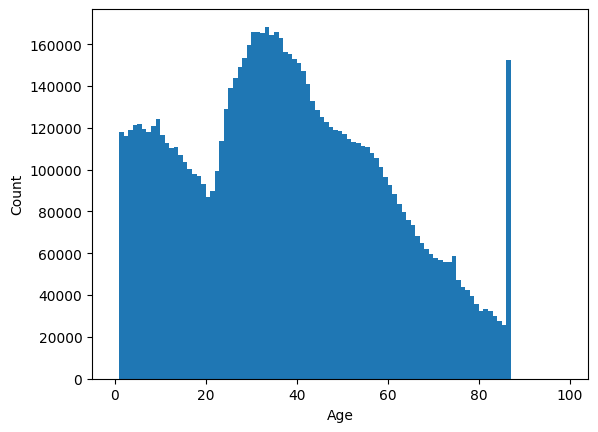

In [8]:
# Plot Age
plt.hist(
    spc.people.unnest("demographics").select("age_years"), bins=np.arange(0, 100, 1)
)
plt.gca().set(xlabel="Age", ylabel="Count")
plt.show()

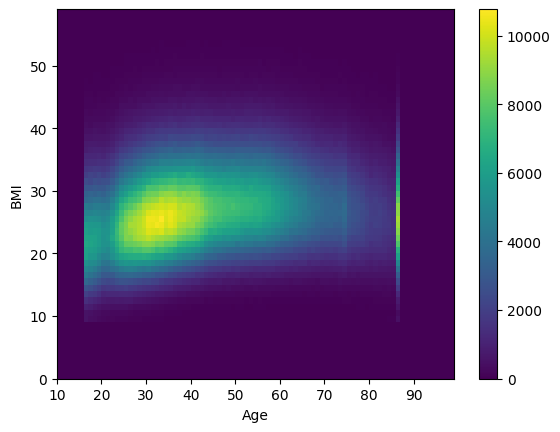

In [9]:
# Plot 2D hist of Age and BMI
age_bmi = (
    spc.people.unnest("demographics")
    .unnest("health")
    .select(["age_years", "bmi"])
    .filter(pl.col("bmi").is_not_null())
    .to_numpy()
)
plt.hist2d(age_bmi[:, 0], age_bmi[:, 1], bins=[np.arange(10, 100), np.arange(0, 60)])
plt.gca().set(xlabel="Age", ylabel="BMI")
plt.colorbar()
plt.show()